In [4]:
import numpy as np
import torch
import torchvision
from torch.utils.data import DataLoader
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn.functional as functional
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
])

batch_size = 64

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [23]:
def test(model, testloader):
    model.eval()

    correct = 0
    total = 0

    with torch.no_grad():
        for data in testloader:
            images, labels = data[0], data[1]
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total = total + labels.size(0)
            correct = correct + (predicted == labels).sum().item()

    acc = correct / total

    return acc


In [5]:
class miniAlexNet(nn.Module):
    def __init__(self, num_classes: int = 10) -> None:
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=5, stride=3, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
            nn.Conv2d(96, 256, kernel_size=5, stride=3, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        )
        self.classifier = nn.Sequential(
            nn.Linear(256 * 4 * 4, 384),
            nn.ReLU(),
            nn.Linear(384, 192),
            nn.ReLU(),
            nn.Linear(192, num_classes)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

In [6]:
seed = 726
torch.manual_seed(seed)
model = miniAlexNet()

In [7]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.0001
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

Epoch 1/100 [Testing]: 100%|██████████████████| 157/157 [00:11<00:00, 13.26it/s]


epoch 1 finished, test accuracy: 0.1177


Epoch 2/100 [Testing]: 100%|██████████████████| 157/157 [00:11<00:00, 13.32it/s]


epoch 2 finished, test accuracy: 0.2029


Epoch 3/100 [Testing]: 100%|██████████████████| 157/157 [00:11<00:00, 13.27it/s]


epoch 3 finished, test accuracy: 0.2567


Epoch 4/100 [Testing]: 100%|██████████████████| 157/157 [00:12<00:00, 12.71it/s]


epoch 4 finished, test accuracy: 0.2815


Epoch 5/100 [Testing]: 100%|██████████████████| 157/157 [00:12<00:00, 12.77it/s]


epoch 5 finished, test accuracy: 0.3070


Epoch 6/100 [Testing]: 100%|██████████████████| 157/157 [00:12<00:00, 12.70it/s]


epoch 6 finished, test accuracy: 0.3340


Epoch 7/100 [Testing]: 100%|██████████████████| 157/157 [00:12<00:00, 12.73it/s]


epoch 7 finished, test accuracy: 0.3514


Epoch 8/100 [Testing]: 100%|██████████████████| 157/157 [00:12<00:00, 12.69it/s]


epoch 8 finished, test accuracy: 0.3806


Epoch 9/100 [Testing]: 100%|██████████████████| 157/157 [00:12<00:00, 12.74it/s]


epoch 9 finished, test accuracy: 0.3934


Epoch 10/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.70it/s]


epoch 10 finished, test accuracy: 0.4168


Epoch 11/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.73it/s]


epoch 11 finished, test accuracy: 0.4243


Epoch 12/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.72it/s]


epoch 12 finished, test accuracy: 0.4385


Epoch 13/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.71it/s]


epoch 13 finished, test accuracy: 0.4422


Epoch 14/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.70it/s]


epoch 14 finished, test accuracy: 0.4599


Epoch 15/100 [Testing]: 100%|█████████████████| 157/157 [00:11<00:00, 13.26it/s]


epoch 15 finished, test accuracy: 0.4736


Epoch 16/100 [Testing]: 100%|█████████████████| 157/157 [00:11<00:00, 13.17it/s]


epoch 16 finished, test accuracy: 0.4739


Epoch 17/100 [Testing]: 100%|█████████████████| 157/157 [00:11<00:00, 13.19it/s]


epoch 17 finished, test accuracy: 0.4931


Epoch 18/100 [Testing]: 100%|█████████████████| 157/157 [00:11<00:00, 13.15it/s]


epoch 18 finished, test accuracy: 0.5039


Epoch 19/100 [Testing]: 100%|█████████████████| 157/157 [00:11<00:00, 13.14it/s]


epoch 19 finished, test accuracy: 0.5107


Epoch 20/100 [Testing]: 100%|█████████████████| 157/157 [00:11<00:00, 13.14it/s]


epoch 20 finished, test accuracy: 0.5092


Epoch 21/100 [Testing]: 100%|█████████████████| 157/157 [00:11<00:00, 13.23it/s]


epoch 21 finished, test accuracy: 0.5264


Epoch 22/100 [Testing]: 100%|█████████████████| 157/157 [00:11<00:00, 13.18it/s]


epoch 22 finished, test accuracy: 0.5253


Epoch 23/100 [Testing]: 100%|█████████████████| 157/157 [00:11<00:00, 13.15it/s]


epoch 23 finished, test accuracy: 0.5326


Epoch 24/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 13.08it/s]


epoch 24 finished, test accuracy: 0.5319


Epoch 25/100 [Testing]: 100%|█████████████████| 157/157 [00:11<00:00, 13.19it/s]


epoch 25 finished, test accuracy: 0.5534


Epoch 26/100 [Testing]: 100%|█████████████████| 157/157 [00:11<00:00, 13.15it/s]


epoch 26 finished, test accuracy: 0.5599


Epoch 27/100 [Testing]: 100%|█████████████████| 157/157 [00:11<00:00, 13.17it/s]


epoch 27 finished, test accuracy: 0.5538


Epoch 28/100 [Testing]: 100%|█████████████████| 157/157 [00:11<00:00, 13.10it/s]


epoch 28 finished, test accuracy: 0.5619


Epoch 29/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.99it/s]


epoch 29 finished, test accuracy: 0.5762


Epoch 30/100 [Testing]: 100%|█████████████████| 157/157 [00:11<00:00, 13.17it/s]


epoch 30 finished, test accuracy: 0.5712


Epoch 31/100 [Testing]: 100%|█████████████████| 157/157 [00:11<00:00, 13.09it/s]


epoch 31 finished, test accuracy: 0.5859


Epoch 32/100 [Testing]: 100%|█████████████████| 157/157 [00:11<00:00, 13.16it/s]


epoch 32 finished, test accuracy: 0.5927


Epoch 33/100 [Testing]: 100%|█████████████████| 157/157 [00:11<00:00, 13.14it/s]


epoch 33 finished, test accuracy: 0.5974


Epoch 34/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 13.07it/s]


epoch 34 finished, test accuracy: 0.6008


Epoch 35/100 [Testing]: 100%|█████████████████| 157/157 [00:11<00:00, 13.14it/s]


epoch 35 finished, test accuracy: 0.6013


Epoch 36/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.63it/s]


epoch 36 finished, test accuracy: 0.6069


Epoch 37/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.65it/s]


epoch 37 finished, test accuracy: 0.6143


Epoch 38/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.66it/s]


epoch 38 finished, test accuracy: 0.6200


Epoch 39/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 13.02it/s]


epoch 39 finished, test accuracy: 0.6226


Epoch 40/100 [Testing]: 100%|█████████████████| 157/157 [00:11<00:00, 13.16it/s]


epoch 40 finished, test accuracy: 0.6206


Epoch 41/100 [Testing]: 100%|█████████████████| 157/157 [00:11<00:00, 13.15it/s]


epoch 41 finished, test accuracy: 0.6269


Epoch 42/100 [Testing]: 100%|█████████████████| 157/157 [00:11<00:00, 13.09it/s]


epoch 42 finished, test accuracy: 0.6149


Epoch 43/100 [Testing]: 100%|█████████████████| 157/157 [00:11<00:00, 13.14it/s]


epoch 43 finished, test accuracy: 0.6290


Epoch 44/100 [Testing]: 100%|█████████████████| 157/157 [00:11<00:00, 13.09it/s]


epoch 44 finished, test accuracy: 0.6291


Epoch 45/100 [Testing]: 100%|█████████████████| 157/157 [00:11<00:00, 13.15it/s]


epoch 45 finished, test accuracy: 0.6278


Epoch 46/100 [Testing]: 100%|█████████████████| 157/157 [00:11<00:00, 13.14it/s]


epoch 46 finished, test accuracy: 0.6401


Epoch 47/100 [Testing]: 100%|█████████████████| 157/157 [00:11<00:00, 13.09it/s]


epoch 47 finished, test accuracy: 0.6437


Epoch 48/100 [Testing]: 100%|█████████████████| 157/157 [00:11<00:00, 13.11it/s]


epoch 48 finished, test accuracy: 0.6429


Epoch 49/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 13.04it/s]


epoch 49 finished, test accuracy: 0.6544


Epoch 50/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 13.08it/s]


epoch 50 finished, test accuracy: 0.6509


Epoch 51/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.97it/s]


epoch 51 finished, test accuracy: 0.6610


Epoch 52/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.73it/s]


epoch 52 finished, test accuracy: 0.6562


Epoch 53/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.62it/s]


epoch 53 finished, test accuracy: 0.6625


Epoch 54/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.67it/s]


epoch 54 finished, test accuracy: 0.6668


Epoch 55/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.65it/s]


epoch 55 finished, test accuracy: 0.6618


Epoch 56/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.67it/s]


epoch 56 finished, test accuracy: 0.6610


Epoch 57/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.59it/s]


epoch 57 finished, test accuracy: 0.6709


Epoch 58/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.69it/s]


epoch 58 finished, test accuracy: 0.6713


Epoch 59/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.70it/s]


epoch 59 finished, test accuracy: 0.6727


Epoch 60/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.62it/s]


epoch 60 finished, test accuracy: 0.6671


Epoch 61/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.64it/s]


epoch 61 finished, test accuracy: 0.6609


Epoch 62/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.60it/s]


epoch 62 finished, test accuracy: 0.6731


Epoch 63/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.56it/s]


epoch 63 finished, test accuracy: 0.6774


Epoch 64/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.61it/s]


epoch 64 finished, test accuracy: 0.6724


Epoch 65/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.62it/s]


epoch 65 finished, test accuracy: 0.6779


Epoch 66/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.65it/s]


epoch 66 finished, test accuracy: 0.6801


Epoch 67/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.66it/s]


epoch 67 finished, test accuracy: 0.6826


Epoch 68/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.67it/s]


epoch 68 finished, test accuracy: 0.6858


Epoch 69/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.67it/s]


epoch 69 finished, test accuracy: 0.6856


Epoch 70/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.66it/s]


epoch 70 finished, test accuracy: 0.6885


Epoch 71/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.60it/s]


epoch 71 finished, test accuracy: 0.6899


Epoch 72/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.57it/s]


epoch 72 finished, test accuracy: 0.6855


Epoch 73/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.58it/s]


epoch 73 finished, test accuracy: 0.6915


Epoch 74/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.55it/s]


epoch 74 finished, test accuracy: 0.6951


Epoch 75/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.61it/s]


epoch 75 finished, test accuracy: 0.6897


Epoch 76/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.57it/s]


epoch 76 finished, test accuracy: 0.6930


Epoch 77/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.63it/s]


epoch 77 finished, test accuracy: 0.6952


Epoch 78/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.60it/s]


epoch 78 finished, test accuracy: 0.6899


Epoch 79/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.63it/s]


epoch 79 finished, test accuracy: 0.6947


Epoch 80/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.60it/s]


epoch 80 finished, test accuracy: 0.6999


Epoch 81/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.67it/s]


epoch 81 finished, test accuracy: 0.6977


Epoch 82/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.62it/s]


epoch 82 finished, test accuracy: 0.7012


Epoch 83/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.65it/s]


epoch 83 finished, test accuracy: 0.6962


Epoch 84/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.60it/s]


epoch 84 finished, test accuracy: 0.7003


Epoch 85/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.66it/s]


epoch 85 finished, test accuracy: 0.7001


Epoch 86/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.67it/s]


epoch 86 finished, test accuracy: 0.6972


Epoch 87/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.59it/s]


epoch 87 finished, test accuracy: 0.6885


Epoch 88/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.63it/s]


epoch 88 finished, test accuracy: 0.7064


Epoch 89/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.64it/s]


epoch 89 finished, test accuracy: 0.7043


Epoch 90/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.57it/s]


epoch 90 finished, test accuracy: 0.6999


Epoch 91/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.61it/s]


epoch 91 finished, test accuracy: 0.7052


Epoch 92/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.58it/s]


epoch 92 finished, test accuracy: 0.7041


Epoch 93/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.58it/s]


epoch 93 finished, test accuracy: 0.7013


Epoch 94/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.56it/s]


epoch 94 finished, test accuracy: 0.7042


Epoch 95/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.61it/s]


epoch 95 finished, test accuracy: 0.7074


Epoch 96/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.68it/s]


epoch 96 finished, test accuracy: 0.6998


Epoch 97/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.62it/s]


epoch 97 finished, test accuracy: 0.7008


Epoch 98/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.68it/s]


epoch 98 finished, test accuracy: 0.6838


Epoch 99/100 [Testing]: 100%|█████████████████| 157/157 [00:12<00:00, 12.64it/s]


epoch 99 finished, test accuracy: 0.6977


Epoch 100/100 [Testing]: 100%|████████████████| 157/157 [00:12<00:00, 12.63it/s]


epoch 100 finished, test accuracy: 0.6942
Finished training


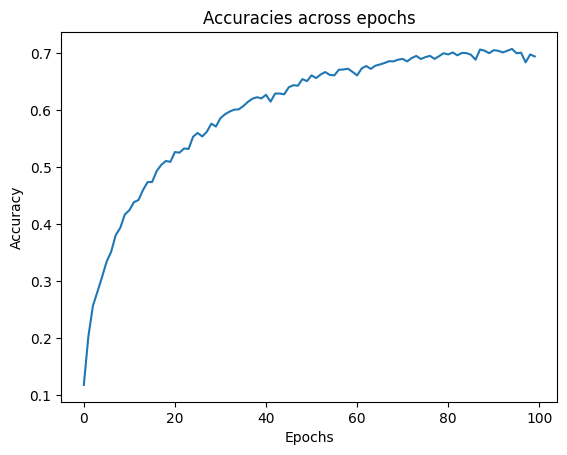

In [8]:
epochs = 100
accuracy = []

for epoch in range(epochs):
    correct = 0.0
    total = 0.0

    model.train()
    total_loss = 0.0

    train_pbar = tqdm(trainloader, desc=f"Epoch {epoch+1}/{epochs} [Training]", leave=True)
    for i, data in enumerate(train_pbar):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        avg_loss = total_loss / (i + 1) 
        train_pbar.set_postfix(loss=f"{avg_loss:.4f}")
    
    model.eval()
    with torch.no_grad():
        test_pbar = tqdm(testloader, desc=f"Epoch {epoch+1}/{epochs} [Testing]")
        for testdata in test_pbar:
            images, testlabels = testdata
            testlabels = functional.one_hot(testlabels,num_classes=10).float()
            predictions = model(images)
            _, predicted_labels = torch.max(predictions.data, 1)
            total += testlabels.size(0)
            correct += (predicted_labels == testlabels.argmax(dim=1)).sum().item()

        acc = correct / total
        accuracy.append(acc)
    
    print(f'epoch {epoch + 1} finished, test accuracy: {acc:.4f}')
    if total_loss < 0.0001:
        break

print('Finished training')

acc_array = np.array(accuracy)
fig, ax = plt.subplots()
ax.plot(acc_array)
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracies across epochs')
plt.show()

In [9]:
model.eval()

w1 = model.classifier[0].weight.detach()
w2 = model.classifier[2].weight.detach()
w3 = model.classifier[4].weight.detach()

u1, s1, vh1 = torch.linalg.svd(w1, full_matrices=False)
u2, s2, vh2 = torch.linalg.svd(w2, full_matrices=False)
u3, s3, vh3 = torch.linalg.svd(w3, full_matrices=False)

n1, p1 = w1.size()
n2, p2 = w2.size()
n3, p3 = w3.size()

print(n1,p1,n2,p2,n3,p3)

384 4096 192 384 10 192


In [36]:
k1 = min(n1,p1)
k2 = min(n2,p2)

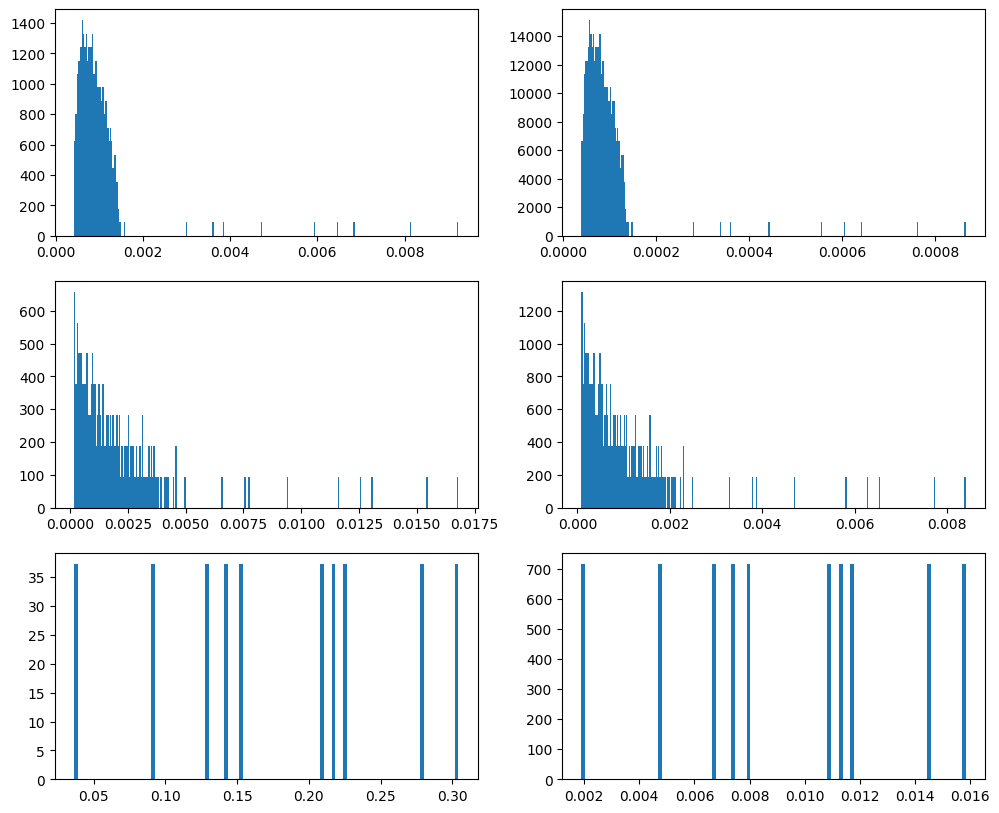

In [16]:
fig, ax = plt.subplots(3,2, figsize=(12,10))
ax[0,0].hist(s1**2 / n1, density=True, bins=300)
ax[0,1].hist(s1**2 / p1, density=True, bins=300)
ax[1,0].hist(s2**2 / n2, density=True, bins=300)
ax[1,1].hist(s2**2 / p2, density=True, bins=300)
ax[2,0].hist(s3**2 / n3, density=True, bins=100)
ax[2,1].hist(s3**2 / p3, density=True, bins=100)
plt.show()

In [30]:
model_lr = miniAlexNet()
model_reg_travg = miniAlexNet()

model_lr.load_state_dict(model.state_dict())
model_reg_travg.load_state_dict(model.state_dict())

<All keys matched successfully>

In [32]:
r1 = 9
r2 = 9

model_lr.classifier[0].weight = nn.Parameter(u1[:,0:r1] @ torch.diag(s1[0:r1]) @ vh1[0:r1,:])
model_lr.classifier[2].weight = nn.Parameter(u2[:,0:r2] @ torch.diag(s2[0:r2]) @ vh2[0:r2,:])

acc_lr = test(model_lr, testloader)
acc_orig = test(model, testloader)

print(acc_lr, acc_lr / acc_orig)

0.6784 0.9772399884759435


In [33]:
print(s1[0:r1].sum() / s1.sum())
print(s2[0:r2].sum() / s2.sum())

tensor(0.0579)
tensor(0.1185)


In [34]:
u1_reg_travg, spec_n1, _ = torch.linalg.svd(u1[:,0:r1] @ torch.diag(s1[0:r1]**2) @ u1[:,0:r1].T + 
                                      torch.trace(w1 @ w1.T - u1[:,0:r1] @ torch.diag(s1[0:r1]**2) @ u1[:,0:r1].T) * 
                                      torch.eye(n1) / n1)
u2_reg_travg, spec_n2, _ = torch.linalg.svd(u2[:,0:r2] @ torch.diag(s2[0:r2]**2) @ u2[:,0:r2].T + 
                                      torch.trace(w2 @ w2.T - u2[:,0:r2] @ torch.diag(s2[0:r2]**2) @ u2[:,0:r2].T) * 
                                      torch.eye(n2) / n2)
_, spec_p1, vh1_reg_travg = torch.linalg.svd(vh1[0:r1,:].T @ torch.diag(s1[0:r1]**2) @ vh1[0:r1,:] + 
                                       torch.trace(w1.T @ w1 - vh1[0:r1,:].T @ torch.diag(s1[0:r1]**2) @ vh1[0:r1,:]) * 
                                       torch.eye(p1) / p1)
_, spec_p2, vh2_reg_travg = torch.linalg.svd(vh2[0:r2,:].T @ torch.diag(s2[0:r2]**2) @ vh2[0:r2,:] + 
                                       torch.trace(w2.T @ w2 - vh2[0:r2,:].T @ torch.diag(s2[0:r2]**2) @ vh2[0:r2,:]) * 
                                       torch.eye(p2) / p2)

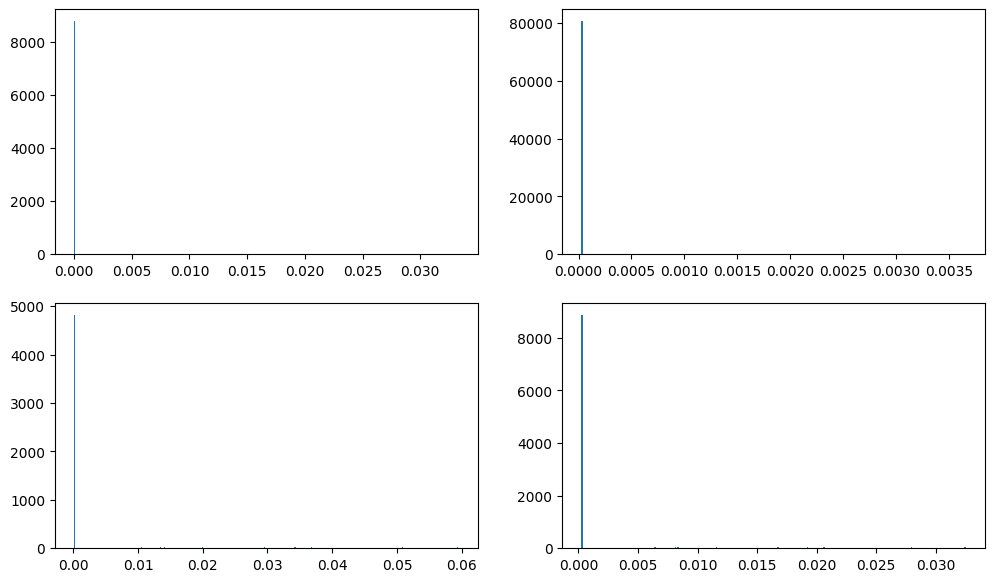

In [44]:
fig_reg, ax_reg = plt.subplots(2,2, figsize=(12,7))
ax_reg[0,0].hist(spec_p1[0:k1]**2 / n1, density=True, bins=300)
ax_reg[0,1].hist(spec_n1[0:k1]**2 / p1, density=True, bins=300)
ax_reg[1,0].hist(spec_p2[0:k2]**2 / n2, density=True, bins=300)
ax_reg[1,1].hist(spec_n2[0:k2]**2 / p2, density=True, bins=300)
plt.show()

In [38]:
model_reg_travg.classifier[0].weight = nn.Parameter(u1_reg_travg[:,0:k1] @ torch.diag(s1[0:k1]) @ vh1_reg_travg[0:k1,:])
model_reg_travg.classifier[2].weight = nn.Parameter(u2_reg_travg[:,0:k2] @ torch.diag(s2[0:k2]) @ vh2_reg_travg[0:k2,:])

acc_reg_travg = test(model_reg_travg, testloader)

print(acc_reg_travg, acc_reg_travg / acc_orig)

0.0985 0.1418899452607318


In [39]:
model_reg_diag = miniAlexNet()
model_reg_diag.load_state_dict(model.state_dict())

<All keys matched successfully>

In [40]:
u1_reg_diag, spec_diag_n1, _ = torch.linalg.svd(u1[:,0:r1] @ torch.diag(s1[0:r1]**2) @ u1[:,0:r1].T + 
                                      torch.diag(torch.diag(w1 @ w1.T - u1[:,0:r1] @ torch.diag(s1[0:r1]**2) @ u1[:,0:r1].T)))
u2_reg_diag, spec_diag_n2, _ = torch.linalg.svd(u2[:,0:r2] @ torch.diag(s2[0:r2]**2) @ u2[:,0:r2].T + 
                                      torch.diag(torch.diag(w2 @ w2.T - u2[:,0:r2] @ torch.diag(s2[0:r2]**2) @ u2[:,0:r2].T)))
_, spec_diag_p1, vh1_reg_diag = torch.linalg.svd(vh1[0:r1,:].T @ torch.diag(s1[0:r1]**2) @ vh1[0:r1,:] + 
                                       torch.diag(torch.diag(w1.T @ w1 - vh1[0:r1,:].T @ torch.diag(s1[0:r1]**2) @ vh1[0:r1,:])))
_, spec_diag_p2, vh2_reg_diag = torch.linalg.svd(vh2[0:r2,:].T @ torch.diag(s2[0:r2]**2) @ vh2[0:r2,:] + 
                                       torch.diag(torch.diag(w2.T @ w2 - vh2[0:r2,:].T @ torch.diag(s2[0:r2]**2) @ vh2[0:r2,:])))

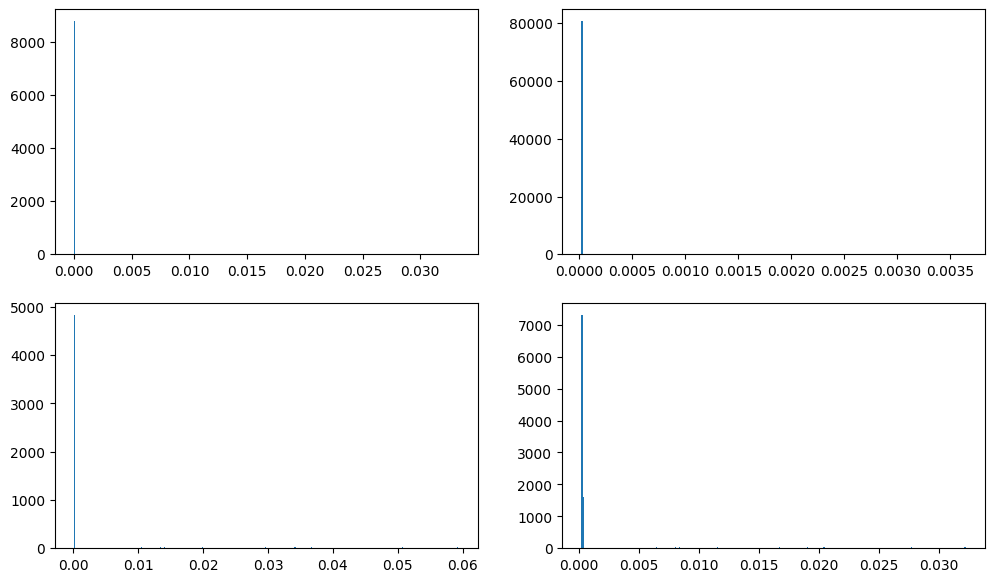

In [45]:
fig_reg_diag, ax_reg_diag = plt.subplots(2,2, figsize=(12,7))
ax_reg_diag[0,0].hist(spec_diag_p1[0:k1]**2 / n1, density=True, bins=300)
ax_reg_diag[0,1].hist(spec_diag_n1[0:k1]**2 / p1, density=True, bins=300)
ax_reg_diag[1,0].hist(spec_diag_p2[0:k2]**2 / n2, density=True, bins=300)
ax_reg_diag[1,1].hist(spec_diag_n2[0:k2]**2 / p2, density=True, bins=300)
plt.show()

In [43]:
model_reg_diag.classifier[0].weight = nn.Parameter(u1_reg_diag[:,0:k1] @ torch.diag(s1[0:k1]) @ vh1_reg_diag[0:k1,:])
model_reg_diag.classifier[2].weight = nn.Parameter(u2_reg_diag[:,0:k2] @ torch.diag(s2[0:k2]) @ vh2_reg_diag[0:k2,:])

acc_reg_diag = test(model_reg_diag, testloader)

print(acc_reg_diag, acc_reg_diag / acc_orig)

0.1056 0.15211754537597233
